In [1]:
from occultence import *

(0.99, 1.015)

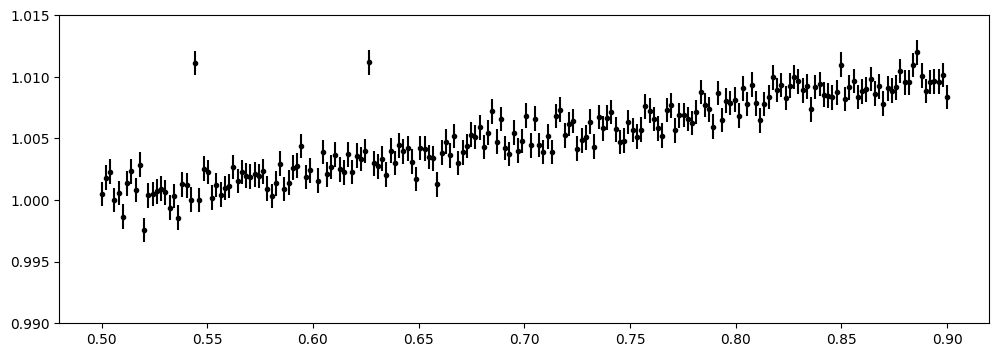

In [2]:
t = np.linspace(0.5,0.9,200)
ferr = 1e-3 * np.ones(len(t))
f = 1 + (ferr * (np.random.randn(len(t))))
f[22] = 1.01 # add a cosmic
f[63] = 1.008 # add a cosmic
f[50] = 0.0 # add a zero flux point
# f[100:120] *= 0.995 # add a transit
f *= np.linspace(1,1.01, len(t)) # add a linear trend for the GP to remove
plt.figure(figsize=(12,4))
plt.errorbar(t,f,ferr,fmt='k.')
plt.ylim(0.99,1.015)

In [3]:
targ = LightCurve(name = "test",
                  time = t,
                  flux = f,
                  uncertainty = np.abs(ferr),
                  metadata={'R_star':0.1*u.R_sun, 'M_star':0.1*u.M_sun})

🌈🤖 Warning! The time array is not an astropy.Time object, therefore there is no info about the 
format or scale.
We will assume that it is JD and TDB from here on!



In [4]:
targ_with_transit = targ.inject_transit(per=5*u.d, epoch=0.7 * u.d, inc=90 * u.degree, rp=1 * u.R_earth, ld=[0.3,0.3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Time [d]', ylabel='Flux'>

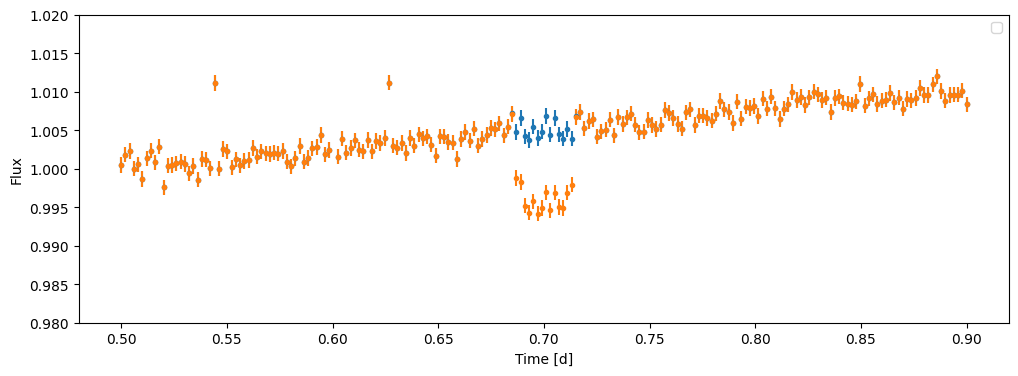

In [5]:
ax=targ.plot()
targ_with_transit.plot(ax=ax)

In [6]:
targ_with_transit.metadata

{'name': 'test_inject',
 'target': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 5. d>],
  'epoch': [<Quantity 0.7 d>],
  'inc': [<Quantity 90. deg>],
  'rp': [<Quantity 1. earthRad>],
  'a': [<Quantity 5.71151244 solRad>],
  'a_Rs': [<Quantity 57.11512439>],
  'ld': [[0.3, 0.3]],
  'depth': [<Quantity 0.00840502>],
  'duration': [<Quantity 0.03042218 d>]}}

In [7]:
planets = targ_with_transit.create_lots_of_transit_params(nfake=100, 
                                                          minimum_planet_radius=0.5 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                                                          minimum_period=0.5 * u.d, maximum_period=1 * u.d,)

In [13]:
planets

,logP,phase,cosi,r_p,depth,duration,epoch,a,a_Rs,recovered,...,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,-0.234584,0.649382,0.014229,0.903314,0.006858296103106765,0.014516,0.878370,1.3626426208343891 solRad,13.62642620834389,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
1,-0.284807,0.397177,0.021443,1.754626,0.0258766267193426,0.014808,0.706147,1.261536133822697 solRad,12.615361338226968,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
2,-0.061064,0.356379,0.007767,0.748949,0.004714585332669929,0.016488,0.809634,1.7785330338992058 solRad,17.785330338992058,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
3,-0.015865,0.951620,0.002261,1.137807,0.0108811720953088,0.017774,1.417484,1.9063134827290467 solRad,19.063134827290465,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
4,-0.003752,0.186315,0.006436,1.937935,0.031565814104874655,0.019040,0.684713,1.9420922492761485 solRad,19.420922492761484,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.167868,0.757977,0.011131,1.521342,0.019453268090769252,0.016162,1.014977,1.509591218885256 solRad,15.09591218885256,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
96,-0.266553,0.300404,0.011093,2.688961,0.06077256051319443,0.016470,0.662612,1.297386683443948 solRad,12.97386683443948,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
97,-0.167824,0.679275,0.006619,1.445728,0.017567578082275916,0.016177,0.961553,1.509691509775302 solRad,15.096915097753019,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
98,-0.028952,0.763108,0.003680,0.717054,0.004321574210661529,0.016959,1.213894,1.8683985910077743 solRad,18.68398591007774,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None


In [76]:
lcs, lcs_clean, lcs_gp, lcs_bls, planets_df = targ.full_injection_recovery(nfake=20, 
                                                                           pool=False, 
                                                                           minimum_planet_radius=0.1 * u.R_earth, 
                                                                           maximum_planet_radius=1 * u.R_earth,
                                                                           minimum_period=0.5 * u.d, 
                                                                           maximum_period=2 * u.d, 
                                                                           recovery_kw = {'condition_on_epoch':1 * u.hour}, 
                                                                           verbose=False)

/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/cleaning/clean.py:78: UserWarning:  The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
                 This array is necessary to calculate bad weather, therefore this will ** not ** be applied!
  warnings.warn(f""" The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/cleaning/clean.py:78: UserWarning:  The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
                 This array is necessary to calculate bad weather, therefore this will ** not ** be a

In [77]:
planets_df

,logP,phase,cosi,r_p,depth,duration,epoch,a,a_Rs,recovered,...,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,0.264214,0.278129,0.000576,0.510223,0.002188056824542468,0.020895,1.011047,2.9303117299771806 solRad,29.303117299771802,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
1,0.300537,0.725441,0.000591,0.662780,0.0036921335122168802,0.021772,1.949235,3.0983385196827213 solRad,30.98338519682721,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
2,-0.034262,0.970424,0.006912,0.232027,0.0004524972938697983,0.016091,1.396808,1.8532311146205545 solRad,18.532311146205544,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
3,0.072713,0.920464,0.004421,0.830480,0.00579691541137131,0.018476,1.588228,2.183969286058286 solRad,21.83969286058286,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
4,-0.062097,0.653075,0.002241,0.249446,0.0005229862143512597,0.015890,1.066064,1.7757140867483074 solRad,17.757140867483074,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
5,0.188244,0.656737,0.003010,0.267062,0.000599464852084441,0.019238,1.513060,2.607757202533944 solRad,26.07757202533944,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
6,0.257599,0.892276,0.000257,0.125810,0.00013303680525741671,0.020091,2.114722,2.9007043329266904 solRad,29.007043329266903,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
7,-0.145939,0.629798,0.008072,0.607447,0.003101382517389858,0.015282,0.950052,1.561272627615921 solRad,15.61272627615921,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
8,0.200883,0.196567,0.002439,0.824004,0.005706863329889587,0.020417,0.812172,2.6588439369887737 solRad,26.588439369887734,1.0,...,0.005051,0.02,0.810404,0.0,10.101069,test,0.1 solRad,0.1 solMass,None,None
9,0.133033,0.434918,0.002295,0.769213,0.004973152309308019,0.019301,1.090801,2.3958515425991855 solRad,23.958515425991855,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None


In [78]:
lcs[0].metadata, lcs_bls[0].metadata

({'name': 'test_inject0',
  'target': 'test',
  'R_star': <Quantity 0.1 solRad>,
  'M_star': <Quantity 0.1 solMass>,
  'injected_planet': {'period': [<Quantity 1.83744373 d>],
   'epoch': [<Quantity 1.01104723 d>],
   'inc': [<Quantity 1.57022075 rad>],
   'rp': [<Quantity 0.51022294 earthRad>],
   'a': [<Quantity 2.93031173 solRad>],
   'a_Rs': [<Quantity 29.3031173>],
   'ld': [[0.385, 0.304]],
   'depth': [<Quantity 0.00218806>],
   'duration': [<Quantity 0.02089491 d>]},
  'thresholds': {}},
 {'name': 'test_inject0_clean_bin_bls',
  'target': 'test',
  'R_star': <Quantity 0.1 solRad>,
  'M_star': <Quantity 0.1 solMass>,
  'injected_planet': {'period': [<Quantity 1.83744373 d>],
   'epoch': [<Quantity 1.01104723 d>],
   'inc': [<Quantity 1.57022075 rad>],
   'rp': [<Quantity 0.51022294 earthRad>],
   'a': [<Quantity 2.93031173 solRad>],
   'a_Rs': [<Quantity 29.3031173>],
   'ld': [[0.385, 0.304]],
   'depth': [<Quantity 0.00218806>],
   'duration': [<Quantity 0.02089491 d>]},
  'th

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


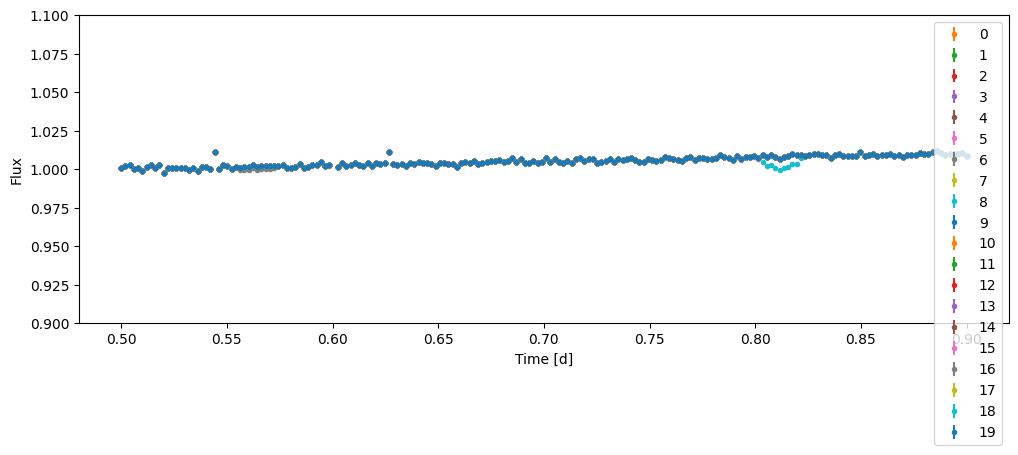

In [79]:
ax=targ.plot()
for i, lc in enumerate(lcs):
    lc.plot(ax=ax, label=i, ylims=[0.9,1.1])
plt.legend()

For whatever reason the pooling doesn't seem to work in Jupyter on my computer...?

In [80]:
# pool = mp.Pool(5)
# lcs = pool.starmap(inject_transit, [(targ, (10**logp) * u.d, phase * 10**logp * u.d, math.acos(cosi) * u.radian,
#                                               rp * u.R_earth, [0.1,0.1]) for
#                                              logp, phase, cosi, rp in zip(planets['logP'], planets['phase'], planets['cosi'],
#                                                                           planets['r_p'])])

Text(0.5, 0, 'Planet Radius [R_earth]')

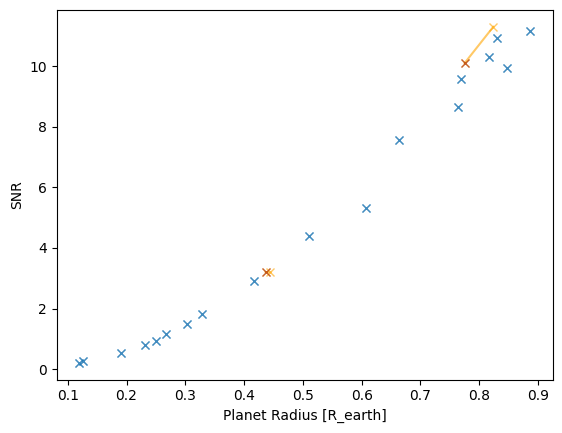

In [81]:
n_points_in_transit = planets_df['duration']/(7.5/(24*60))
lc_noise = 1e-3
rec_r_p = [x.to_value("R_earth") for x in (np.sqrt(planets_df['rec_depth']) * planets_df['r_s']).values]

for r_p, depth, rec, r_p_rec, snr, n in zip(planets_df['r_p'], planets_df['depth'],  planets_df['recovered'],rec_r_p,  planets_df['snr'], n_points_in_transit):
    if rec == 1.0:
        color = "orange"
    else:
        color = "C0"
    if r_p_rec == 0.0:
        r_p_rec = r_p
        snr = depth * np.sqrt(n)/lc_noise
    plt.plot([r_p,r_p_rec], [depth * np.sqrt(n)/lc_noise, snr], 'x-', color=color, alpha=0.6)
    if rec == 1.0:
        plt.plot([r_p_rec], [snr], 'x', color='darkred', alpha=0.5)
plt.ylabel("SNR")
plt.xlabel("Planet Radius [R_earth]")
# plot_transitparams(results[4]['r_p'], results[4]['depth'] * np.sqrt(n_points_in_transit)/lc_noise, results[4]['recovered'], xlabel="Radius", ylabel="SNR", zlabel="Detected?", ylims=[], yscale='uniform',
#                        xscale='uniform', add_points={}, svname="")

Print recovery stats:

In [82]:
print(f"Planets recovered: {100 * len(planets_df.loc[planets_df['recovered'] == 1.0]) /  len(planets_df['recovered'])}%")
print("But not all of those planets transited during the observation window...")
print(f"""Observed Planets recovered: {100 * len(planets_df.loc[(planets_df['recovered'] == 1.0) & 
            (planets_df['observed'] == 1.0)]) /  len(planets_df['recovered'][planets_df['observed']==1.0])}%""")

Planets recovered: 10.0%
But not all of those planets transited during the observation window...
Observed Planets recovered: 100.0%


Plot only the planets which were observed:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


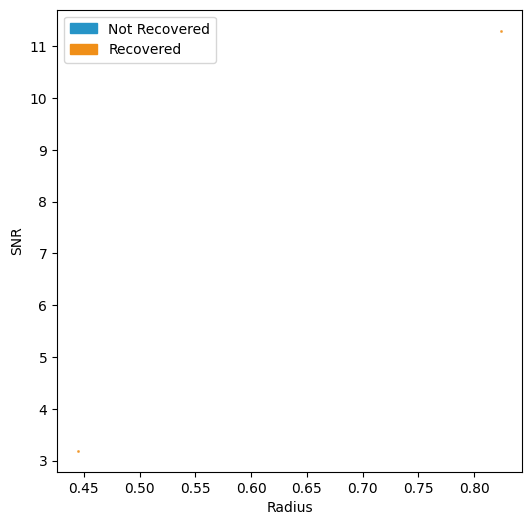

In [83]:
plot_transitparams(x=planets_df['r_p'][planets_df['observed'] == 1.0], 
                   y=planets_df['depth'][planets_df['observed'] == 1.0] * np.sqrt(n_points_in_transit[planets_df['observed'] == 1.0])/lc_noise, 
                   z=planets_df['recovered'][planets_df['observed'] == 1.0], 
                   xlabel="Radius", 
                   ylabel="SNR", 
                   zlabel="Detected?", 
                   ylims=[], 
                   yscale='uniform',
                   xscale='uniform', 
                   add_points={}, 
                   svname="")